In [78]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm 
from sklearn.model_selection import train_test_split


In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D

In [80]:
Charmander = 'mainset/Charmander'   #0
Pikachu = 'mainset/Pikachu'         #1

char_images = []
pika_images = []
target_size = (128, 128)

for filename in os.listdir(Charmander):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(Charmander, filename))
        img = cv2.resize(img, target_size)
        char_images.append(img)

# Loop through the files in folder2        
for filename in os.listdir(Pikachu):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(Pikachu, filename))
        img = cv2.resize(img, target_size)
        pika_images.append(img)


In [81]:

images = char_images + pika_images
label = []
for i in range(80):
    label.append([1,0])
for i in range(80):
    label.append([0,1])
print("Num of Imgs",images.__len__())
print("Num of Labs",label.__len__())
x_train,x_test,y_train,y_test = train_test_split(images, label, random_state=42,test_size=0.2)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train.shape,x_test.shape,y_train.shape,y_test.shape

Num of Imgs 160
Num of Labs 160


((128, 128, 128, 3), (32, 128, 128, 3), (128, 2), (32, 2))

In [82]:
model = keras.Sequential([
            keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128,128,3)),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Conv2D(128, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Dense(16),
            keras.layers.Flatten(),
            keras.layers.Dense(2, activation='softmax')
        ])
model.summary()

c:\Users\Bean\Anaconda3\envs\ML1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30, 30, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │        28,802 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,034 (711.07 KB)

 Trainable params: 182,034 (711.07 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 32
epochs = 8

In [84]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.4437 - loss: 1.0757 - val_accuracy: 0.5312 - val_loss: 0.7458
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.5302 - loss: 0.6912 - val_accuracy: 0.5312 - val_loss: 0.6810
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.6000 - loss: 0.6063 - val_accuracy: 0.6250 - val_loss: 0.6076
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.8042 - loss: 0.4448 - val_accuracy: 0.8750 - val_loss: 0.4099
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.8771 - loss: 0.3018 - val_accuracy: 0.8750 - val_loss: 0.3272
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.9000 - loss: 0.2033 - val_accuracy: 0.8750 - val_loss: 0.2422
Epoch 7/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.9500 - loss: 0.1450 - val_accuracy: 0.8750 - val_loss: 0.2281
Epoch 8/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step - accuracy: 0.9833 - loss: 0.0779 - val_accuracy: 0.8750 - val_loss: 0.2105


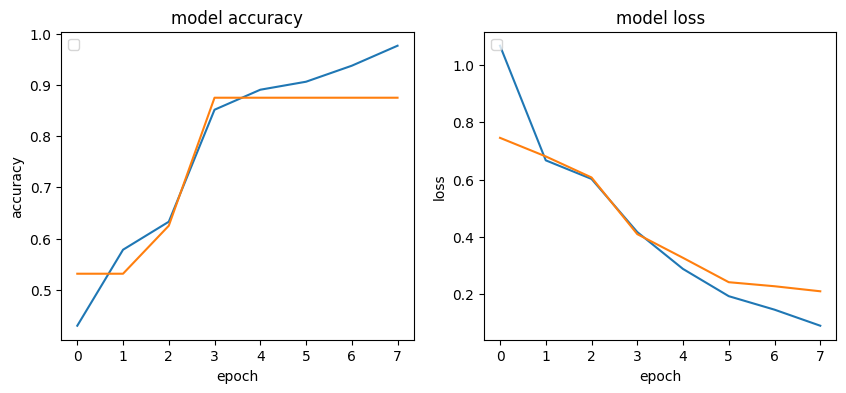

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [86]:
class_names = ['Charmander', 'Pikachu']

In [87]:
# Test Charmander
T = 0
F = 0
for filename in os.listdir(Charmander):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_img = cv2.imread(os.path.join(Charmander, filename))
        test_img = cv2.resize(test_img, target_size)
        rimg1 = np.array(test_img)
        rimg1 = rimg1.astype('float32')  # normalize pixel values
        rimg1 /= 255
        rimg1 = np.expand_dims(rimg1, axis=0)
        prediction = model.predict(rimg1)
        # print(prediction)
        predicted_class = class_names[np.argmax(prediction)]
        print(f"Predicted class: {predicted_class}")
        if predicted_class == 'Charmander':
            T += 1
        else:
            F += 1

print((T/(T+F))*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━

In [88]:
# Test Pikachu      
T = 0
F = 0
for filename in os.listdir(Pikachu):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_img = cv2.imread(os.path.join(Pikachu, filename))
        test_img = cv2.resize(test_img, target_size)
        rimg2 = np.array(test_img)
        rimg2 = rimg2.astype('float32')  # normalize pixel values
        rimg2 /= 255
        rimg2 = np.expand_dims(rimg2, axis=0)
        prediction = model.predict(rimg2)
        # print(prediction)
        predicted_class = class_names[np.argmax(prediction)]
        print(f"Predicted class: {predicted_class}")
        if predicted_class == 'Pikachu':
            T += 1
        else:
            F += 1

print((T/(T+F))*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted clas

In [90]:
#test_model\Charmander.jpg
#test_model\PikaPika.jpg

char_img = cv2.imread('test_model/Charmander.jpg')
char_img = cv2.resize(char_img, (128, 128))
char_rimg = np.array(char_img)
char_rimg = char_rimg.astype('float32')  # normalize pixel values
char_rimg /= 255
char_rimg = np.expand_dims(char_rimg, axis=0)
prediction = model.predict(char_rimg)
# print(prediction)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")


pika_img = cv2.imread('test_model/pikachu-trailer.png')
pika_img = cv2.resize(pika_img, (128, 128))
pika_rimg = np.array(pika_img)
pika_rimg = pika_rimg.astype('float32')  # normalize pixel values
pika_rimg /= 255
pika_rimg = np.expand_dims(pika_rimg, axis=0)
prediction = model.predict(pika_rimg)
# print(prediction)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Pikachu


In [96]:
try_img = cv2.imread('test_model/ezgif-7-e16937c44e.jpg')
try_img = cv2.resize(try_img, (128, 128))
try_rimg = np.array(try_img)
try_rimg = try_rimg.astype('float32')  # normalize pixel values
try_rimg /= 255
try_rimg = np.expand_dims(try_rimg, axis=0)
prediction = model.predict(try_rimg)
# print(prediction)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
